## Clustering Applications

### Customer Segmentation
You can cluster your customers based on their purchases and their activity on your website. this is useful to understand who your customers are and what they need,so you can adapt your products and marketing campaigns to each segment.
For Example, **customer segmentation can be useful in recommender system to suggest content that other users in the same cluster enjoyed**

### Data Analysis
When you analyze a new dataset, it can be helpful to run clustering algorithms and then analyze each cluster separately

### Dimensionality Reduction

Once a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster; affinity is any measure of how well an instance fits into a cluster. Each instance's feature **vector x** can then be replaced with the vector of its cluster affinities. If there are **k clusters** then this vector is **k-dimensional**. The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing

### Feature Engineering
The cluster affinities can often be useful as extra features, in this case, we get the similarities between latitude and longitude and with that information the algorithm define the centroids and the distance to them, so we can use this information as extra features to the model, because the centroids means the main groups so if we want to know what state is good to invest and the element is near the centroids it could be a good thing to help to predict

 ![](../Figures/latitudeLongitudeHousingAfinities.png)

### Anomaly Detection

Any Instance that has a low affinitive to all the cliusters is likely to be an anomaly. For Example if you have clustered the users of your website based on their behaviour, you can detect users with unusual behaviour , such as an unusual number of requests per second

### Search Engines

Some Search Engines let you search for images that are similar to a reference image. To build such a system, you would apply a clustering algorithm to all your images in your database: similar images would end up in the same cluster. Then when a user provides a reference image , all you need to do is use the trained clustering model to find this image's cluster and you could simply return all the images from that cluster


# Cluster Algorithms

### Kmeans

predictions:  [4 0 1 ... 2 1 0] [4 0 1 ... 2 1 0] True


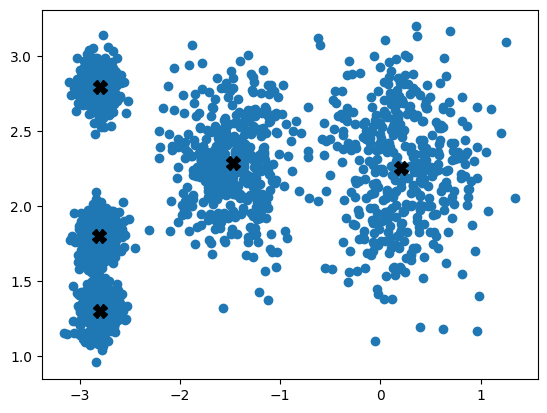

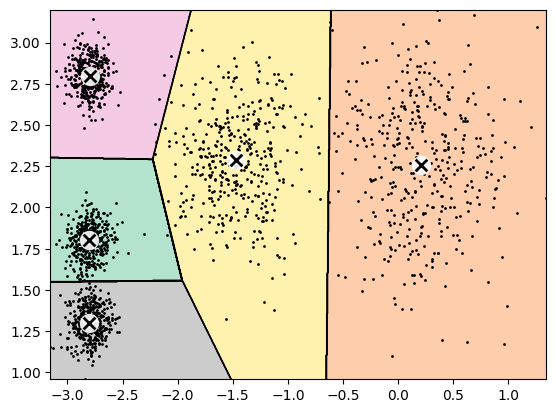

In [72]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1])

print('predictions: ', y_pred, kmeans.labels_, y_pred is kmeans.labels_)

plt.plot(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],
             linestyle="", color="black", marker="X", markersize=10,
             label="Cluster centers")
plt.show()
x_min = x.min(axis=0)
x_max = x.max(axis=0)
xx, yy = np.meshgrid(np.linspace(x_min[0], x_max[0], 1000),
                         np.linspace(x_min[1], x_max[1], 1000))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent=(x_min[0], x_max[0], x_min[1], x_max[1]),
                cmap="Pastel2")
plt.contour(Z, extent=(x_min[0], x_max[0], x_min[1], x_max[1]),
                linewidths=1, colors='k')
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color='w', zorder=10, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color='k', zorder=11, alpha=1)
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
plt.show()

In [36]:
x_new = np.array([[0,2], [3, 2], [-3, 3], [-3,2.5]])
kmeans.predict(x_new)

array([1, 1, 2, 2])

In [74]:
# we can get the affinity or distance to the centroids with transform method from  kmeans
kmeans.transform(x)

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])